In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

In [13]:
data = pd.read_csv('pset2.csv')

In [35]:
pd.set_option("max_columns", 50)

In [51]:

data['law'] = data['primary'] + (data['secondary']*2)

In [53]:
data.head(20)

,state,year,college,beer,primary,secondary,population,unemploy,fatalities,totalvmt,precip,snow32,rural_speed,urban_speed,law
0,AL,1981,0.131424,1.00,0,0,3918.533,10.7,937,27852,4.217500,0.0,55,55,0
1,AL,1982,0.134717,1.00,0,0,3925.263,14.4,839,28516,5.620000,0.0,55,55,0
2,AL,1983,0.137939,1.01,0,0,3934.100,13.7,944,31032,6.341667,0.0,55,55,0
3,AL,1984,0.146007,1.02,0,0,3951.824,11.1,940,32961,4.188333,0.0,55,55,0
4,AL,1985,0.159058,1.06,0,0,3972.520,8.9,881,35091,4.365000,0.0,55,55,0
5,AL,1986,0.167259,1.09,0,0,3991.569,9.8,1081,34003,4.005833,0.0,55,55,0
6,AL,1987,0.167770,1.10,0,0,4015.262,7.8,1110,37426,4.658333,0.0,55,55,0
7,AL,1988,0.155521,1.10,0,0,4023.842,7.2,1023,39684,4.391667,0.0,65,55,0
8,AL,1989,0.145012,1.10,0,0,4030.219,7.0,1029,40765,5.592500,0.0,65,55,0
9,AL,1990,0.139489,1.12,0,0,4050.055,6.9,1118,42347,5.320000,0.0,65,55,0


In [283]:
years = data.pivot(index = 'year', columns = ['state'], values = ['fatalities'])

years = years.transpose()

years.head(40)

year              1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  \
           state                                                               
fatalities AL      937   839   944   940   881  1081  1110  1023  1029  1118   
           AR      535   548   557   512   535   602   639   610   647   604   
           AZ      916   724   675   869   893  1004   937   944   879   869   
           CA     5170  4618  4573  5020  4961  5253  5504  5390  5412  5189   
           CO      755   667   647   609   578   603   591   497   528   544   
           CT      515   515   438   469   448   450   449   484   406   384   
           DE      111   122   110   130   104   136   146   160   116   138   
           FL     3044  2510  2683  2859  2830  2831  2838  3078  2982  2892   
           GA     1418  1229  1293  1411  1361  1530  1599  1653  1632  1562   
           IA      612   480   510   420   474   441   491   557   514   465   
           ID      293   255   263   242   255   258   262   257   238   244   
           IL     1818  1652  1526  1572  1535  1596  1660  1837  1748  1589   
           IN     1130   955  1014   925   974  1038  1055  1101   971  1050   
           KS      578   498   411   510   486   500   491   483   428   444   
           KY      812   822   778   754   712   805   844   838   772   846   
           LA     1206  1091   933   893   931   932   827   925   874   956   
           MA      746   655   651   666   740   749   689   725   700   605   
           MD      781   640   656   643   727   784   814   782   726   682   
           ME      219   168   224   227   206   212   232   255   193   213   
           MI     1564  1417  1314  1525  1543  1594  1597  1704  1631  1566   
           MN      753   571   555   582   609   571   530   612   604   566   
           MO     1041   893   911   968   931  1129  1044  1103  1052  1097   
           MS      744   730   716   680   662   771   756   722   726   746   
           MT      338   254   286   238   223   222   234   198   181   212   
           NC     1491  1306  1231  1446  1481  1647  1584  1573  1471  1385   
           ND      166   148   116    99    90   100   101   104    81   112   
           NE      378   261   255   285   237   290   297   261   296   262   
           NH      148   173   191   193   188   172   179   166   187   158   
           NJ     1162  1086   933   927   959  1039  1023  1051   891   886   
           NM      544   577   549   497   535   499   568   487   538   499   
           NV      294   280   252   249   258   233   262   286   308   343   
           NY     2487  2153  2071  2054  2003  2115  2333  2255  2257  2212   
           OH     1780  1607  1585  1644  1640  1673  1772  1763  1772  1636   
           OK      989  1070   842   808   739   698   597   634   648   640   
           OR      645   518   548   571   559   619   620   677   626   579   
           PA     2019  1810  1706  1723  1771  1894  1987  1931  1877  1646   
           RI      102   108   100    79   109   124   113   125   100    84   
           SC      846   730   845   915   952  1059  1086  1034   996   979   
           SD      177   148   174   143   130   134   134   147   152   153   
           TN     1100  1055  1037  1095  1101  1230  1248  1266  1088  1176   

year              1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  \
           state                                                               
fatalities AL     1112  1031  1042  1083  1113  1146  1189  1071  1138   995   
           AR      608   588   583   610   631   615   660   625   604   652   
           AZ      816   809   801   903  1031   994   951   980  1024  1036   
           CA     4685  4189  4163  4226  4192  3989  3688  3494  3559  3753   
           CO      543   522   559   585   645   617   613   628   626   681   
           CT      310   296   342   310   317   310   338   329   301   342   

In [60]:
years = data.pivot(index = 'year', columns = ['state'], values = ['primary'])

years = years.transpose()

def even_number_background(cell_value):

    highlight = 'background-color: darkorange;'
    default = ''

    if type(cell_value) in [float, int]:
        if cell_value  == 1:
            return highlight
    return default

years.style.applymap(even_number_background)

#years.head(50)



In [62]:
years_sec = data.pivot(index = 'year', columns = ['state'], values = ['law'])
years_sec = years_sec.transpose()

def even_number_background(cell_value):

    highlight = 'background-color: darkorange;'
    red    = 'background-color: blue;'
    default = ''
    

    if type(cell_value) in [float, int]:
        if cell_value  == 1:
            return highlight
        if cell_value ==2:
            return red
        
    return default

years_sec.style.applymap(even_number_background)

#years.head(50)


(array([ 19.,  35.,  75., 167., 255., 282., 200.,  56.,  14.,   1.]),
 array([-9.68820981, -9.47235876, -9.25650772, -9.04065667, -8.82480563,
        -8.60895458, -8.39310354, -8.17725249, -7.96140145, -7.7455504 ,
        -7.52969936]),
 <BarContainer object of 10 artists>)

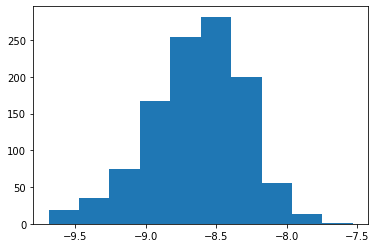

In [202]:
data['log_fatal_per_cap'] = np.log(data['fatalities']/(data['population']*1000))
plt.hist(data['log_fatal_per_cap'])

(array([ 86., 285., 331., 246., 108.,  33.,  10.,   4.,   0.,   1.]),
 array([0.06201032, 0.10949925, 0.15698818, 0.20447712, 0.25196605,
        0.29945498, 0.34694392, 0.39443285, 0.44192178, 0.48941072,
        0.53689965]),
 <BarContainer object of 10 artists>)

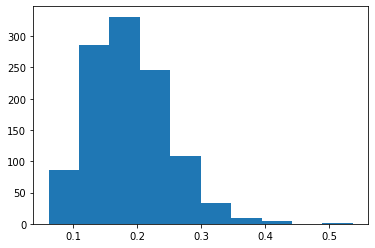

In [203]:
data['fatal_per_cap_1000'] = data['fatalities']/data['population']
plt.hist(data['fatal_per_cap_1000'])

(array([484., 366., 155.,  26.,  12.,  22.,  17.,  10.,   4.,   8.]),
 array([  63. ,  607.1, 1151.2, 1695.3, 2239.4, 2783.5, 3327.6, 3871.7,
        4415.8, 4959.9, 5504. ]),
 <BarContainer object of 10 artists>)

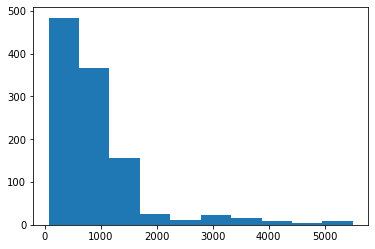

In [204]:
plt.hist(data['fatalities'])

(array([ 36.,  93.,  74., 112., 156., 256., 192., 112.,  38.,  35.]),
 array([4.14313473, 4.59014429, 5.03715386, 5.48416342, 5.93117299,
        6.37818255, 6.82519212, 7.27220168, 7.71921125, 8.16622081,
        8.61323038]),
 <BarContainer object of 10 artists>)

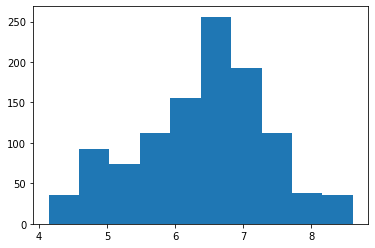

In [205]:
plt.hist(np.log(data['fatalities']))

In [298]:
data['years_post_prim'] = data['year']
df = pd.DataFrame(columns = data.columns)
data['never_treat'] = 0
n = 0
for s in sorted(list(set(list(data['state'])))):
    x = 0
    dat = data[data['state']==s]
    for y in list(set(list(data['year']))):
        if dat.iloc[22]['primary']== 0:
            dat['years_post_prim'] = dat['years_post_prim'] - 2004
            #print(dat['years_post_prim'])
            df = df.append(dat)
            break
        if dat.iloc[x]['primary']==1:
            dat['years_post_prim'] = dat['years_post_prim'] - y
            dat['never_treat'] = 1
            df = df.append(dat)
            break
        x = x+1
        n = n+1
            
#print(df)     

<ipython-input-298-09eb820fbc7e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['years_post_prim'] = dat['years_post_prim'] - y
<ipython-input-298-09eb820fbc7e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['never_treat'] = 1
<ipython-input-298-09eb820fbc7e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [299]:
df['means'] = df['years_post_prim']


for y in list(set(list(df['years_post_prim']))):
    df['means'] = df['means'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 1)]['log_fatal_per_cap'].mean())
    
df['means_nopol'] = df['years_post_prim']

for y in list(set(list(df['years_post_prim']))):
    df['means_nopol'] = df['means_nopol'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 0)]['log_fatal_per_cap'].mean())
    

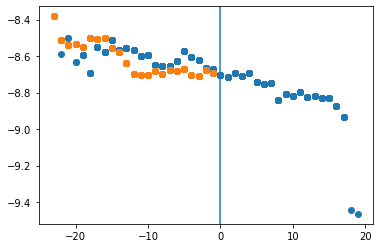

In [300]:
plt.axvline(x = 0)
plt.scatter(df[df['never_treat']==1]['years_post_prim'], df[df['never_treat']==1]['means'])
plt.scatter(df[df['never_treat']==0]['years_post_prim'], df[df['never_treat']==0]['means_nopol'])


In [301]:
df['sums'] = df['years_post_prim']


for y in list(set(list(df['years_post_prim']))):
    df['sums'] = df['sums'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 1)]['log_fatal_per_cap'].median())
    
df['sums_nopol'] = df['years_post_prim']

for y in list(set(list(df['years_post_prim']))):
    df['sums_nopol'] = df['sums_nopol'].replace(y, df[(df['years_post_prim']==y) & (df['never_treat'] == 0)]['log_fatal_per_cap'].median())
    

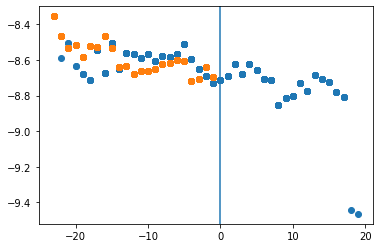

In [302]:
plt.axvline(x = 0)
plt.scatter(df[df['never_treat']==1]['years_post_prim'], df[df['never_treat']==1]['sums'])
plt.scatter(df[df['never_treat']==0]['years_post_prim'], df[df['never_treat']==0]['sums_nopol'])


In [238]:
y = ['log_fatal_per_cap_1000']
x = ['primary', 'secondary']
df['primary'] = df['primary'].astype(int)
df['secondary'] = df['secondary'].astype(int)

vals = sm.OLS(df[y], sm.add_constant(df[x]))
out = vals.fit()
print(out.summary())

                              OLS Regression Results                              
Dep. Variable:     log_fatal_per_cap_1000   R-squared:                       0.063
Model:                                OLS   Adj. R-squared:                  0.061
Method:                     Least Squares   F-statistic:                     37.02
Date:                    Fri, 20 Oct 2023   Prob (F-statistic):           2.77e-16
Time:                            16:28:28   Log-Likelihood:                -333.32
No. Observations:                    1104   AIC:                             672.6
Df Residuals:                        1101   BIC:                             687.7
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [315]:
data['years_post_sec'] = data['year']
df1 = pd.DataFrame(columns = data.columns)
data['never_treats'] = 0
n = 0
for s in sorted(list(set(list(data['state'])))):
    x = -1
    dat = data[data['state']==s]
    for y in list(set(list(data['year']))):
        x = x + 1
        if dat.iloc[x]['secondary']==1:
            dat['years_post_sec'] = dat['years_post_sec'] - y
            dat['never_treats'] = 1
            df1 = df1.append(dat)
            break
        if (dat.iloc[22]['secondary']== 0) & (dat.iloc[22]['primary']== 1):
            dat['years_post_sec'] = dat['years_post_sec'] - y

            dat['never_treats'] = 1
            #print(dat['years_post_sec'])
            df1 = df1.append(dat)
            break
        if (dat.iloc[22]['secondary']== 0) & (dat.iloc[22]['primary']== 0):
            dat['years_post_sec'] = dat['years_post_sec'] - 2004
            df1 = df1.append(dat)
            break
        
    

            
print(df1)     

<ipython-input-315-ea37eb0fe0f2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['years_post_sec'] = dat['years_post_sec'] - y
<ipython-input-315-ea37eb0fe0f2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['never_treats'] = 1
<ipython-input-315-ea37eb0fe0f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

     state  year   college  beer primary secondary  population  unemploy  \
0       AL  1981  0.131424  1.00       0         0    3918.533      10.7   
1       AL  1982  0.134717  1.00       0         0    3925.263      14.4   
2       AL  1983  0.137939  1.01       0         0    3934.100      13.7   
3       AL  1984  0.146007  1.02       0         0    3951.824      11.1   
4       AL  1985  0.159058  1.06       0         0    3972.520       8.9   
...    ...   ...       ...   ...     ...       ...         ...       ...   
1099    WY  1999  0.210634  1.41       0         1     491.780       4.9   
1100    WY  2000  0.212264  1.42       0         1     494.139       3.9   
1101    WY  2001  0.207288  1.43       0         1     494.045       3.9   
1102    WY  2002  0.204025  1.46       0         1     499.045       4.2   
1103    WY  2003  0.207445  1.69       0         1     501.915       4.4   

     fatalities totalvmt    precip    snow32 rural_speed urban_speed law  \
0          

In [311]:
df1['meanss'] = df1['years_post_sec']

print(list(set(list(df1['years_post_sec']))))
for y in list(set(list(df1['years_post_sec']))):
    df1['meanss'] = df1['meanss'].replace(y, df1[(df1['years_post_sec']==y) & (df1['never_treats'] == 1)]['log_fatal_per_cap'].mean())
    
df1['meanss_nopol'] = df1['years_post_sec']

for y in list(set(list(df1['years_post_sec']))):
    df1['meanss_nopol'] = df1['meanss_nopol'].replace(y, df1[(df1['years_post_sec']==y) & (df1['never_treats'] == 0)]['log_fatal_per_cap'].mean())
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


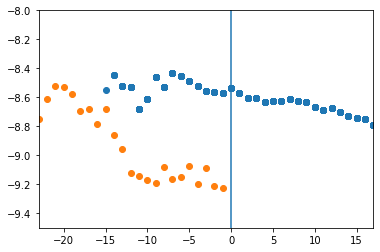

In [312]:
plt.axvline(x = 0)
plt.xlim(right=17)
plt.xlim(left=-23)
plt.ylim(-9.5, -8)
plt.scatter(df1[df1['never_treats']==1]['years_post_sec'], df1[df1['never_treats']==1]['meanss'])
plt.scatter(df1[df1['never_treats']==0]['years_post_sec'], df1[df1['never_treats']==0]['meanss_nopol'])


In [313]:
df1['sumss'] = df1['years_post_sec']


for y in list(set(list(df1['years_post_sec']))):
    df1['sumss'] = df1['sumss'].replace(y, df1[(df1['years_post_sec']==y) & (df1['never_treats'] == 1)]['log_fatal_per_cap'].median())
    
df1['sumss_nopol'] = df1['years_post_sec']

for y in list(set(list(df1['years_post_sec']))):
    df1['sumss_nopol'] = df1['sumss_nopol'].replace(y, df1[(df1['years_post_sec']==y) & (df1['never_treats'] == 0)]['log_fatal_per_cap'].median())
    

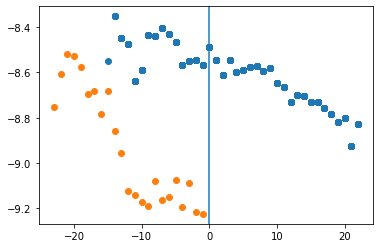

In [314]:
plt.axvline(x = 0)
plt.scatter(df1[df1['never_treats']==1]['years_post_sec'], df1[df1['never_treats']==1]['sumss'])
plt.scatter(df1[df1['never_treats']==0]['years_post_sec'], df1[df1['never_treats']==0]['sumss_nopol'])


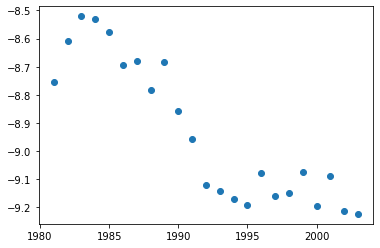

In [281]:
plt.scatter(data[data['state']=='NH']['year'], data[data['state']=='NH']['log_fatal_per_cap'])